In [2]:
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf

In [3]:
datagen=ImageDataGenerator(rescale=1/255)

In [4]:
train=datagen.flow_from_directory('/kaggle/input/face-mask-12k-images-dataset/Face Mask Dataset/Train',class_mode='binary')
test=datagen.flow_from_directory('/kaggle/input/face-mask-12k-images-dataset/Face Mask Dataset/Test',class_mode='binary')

Found 10000 images belonging to 2 classes.
Found 992 images belonging to 2 classes.


In [5]:
train.class_indices

{'WithMask': 0, 'WithoutMask': 1}

In [6]:
input_shape=(256,256,3)

In [7]:
from tensorflow.keras.layers import Flatten,Dense,Dropout,BatchNormalization,Conv2D,MaxPooling2D
from tensorflow.keras.models import Sequential
from tensorflow.keras.metrics import Recall
from tensorflow.keras.optimizers import RMSprop

model=Sequential()

model.add(Conv2D(64,(2,2),input_shape=input_shape,activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
# model.add(BatchNormalization())

model.add(Conv2D(256,(2,2),activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
# model.add(BatchNormalization())

model.add(Dropout(0.3))

model.add(Conv2D(512,(2,2),activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
# model.add(BatchNormalization())

model.add(Dropout(0.3))


model.add(Dropout(0.4))


model.add(Flatten())


model.add(Dense(512,activation='relu'))
model.add(Dropout(0.4))


model.add(Dense(1,activation='sigmoid'))

model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
# model.summary()

In [8]:
from tensorflow.keras.callbacks import EarlyStopping,ReduceLROnPlateau

early=EarlyStopping(monitor='accuracy',patience=3,mode='auto')
reduce_lr = ReduceLROnPlateau(monitor='accuracy', factor=0.5, patience=2, verbose=1,cooldown=0, mode='auto',min_delta=0.0001, min_lr=0)

In [9]:
model.fit(train,epochs=20,validation_data=(test),shuffle=True,callbacks=[early,reduce_lr])

Epoch 1/20
313/313 [==============================] - 67s 215ms/step - loss: 0.3760 - accuracy: 0.9351 - val_loss: 0.0948 - val_accuracy: 0.9657
Epoch 2/20
313/313 [==============================] - 52s 166ms/step - loss: 0.0769 - accuracy: 0.9730 - val_loss: 0.0754 - val_accuracy: 0.9768
Epoch 3/20
313/313 [==============================] - 51s 165ms/step - loss: 0.0600 - accuracy: 0.9783 - val_loss: 0.0454 - val_accuracy: 0.9819
Epoch 4/20
313/313 [==============================] - 52s 166ms/step - loss: 0.0458 - accuracy: 0.9846 - val_loss: 0.0440 - val_accuracy: 0.9869
Epoch 5/20
313/313 [==============================] - 52s 168ms/step - loss: 0.0284 - accuracy: 0.9891 - val_loss: 0.0273 - val_accuracy: 0.9889
Epoch 6/20
313/313 [==============================] - 52s 165ms/step - loss: 0.0252 - accuracy: 0.9911 - val_loss: 0.0263 - val_accuracy: 0.9899
Epoch 7/20
313/313 [==============================] - 52s 166ms/step - loss: 0.0215 - accuracy: 0.9913 - val_loss: 0.0766 - val_ac

without mask


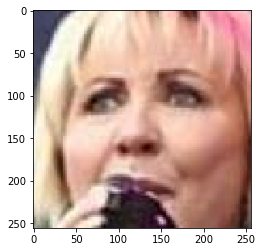

In [11]:
img_path="../input/face-mask-12k-images-dataset/Face Mask Dataset/Test/WithoutMask/1000.png"
import matplotlib.pyplot as plt
%matplotlib inline
from keras.preprocessing import image
img = image.load_img(img_path,target_size=input_shape)
img = np.asarray(img)
plt.imshow(img)
img = np.expand_dims(img, axis=0)
#from keras.models import load_model
#saved_model = load_model("vgg16_1.h5")
output = model.predict(img)
if output[0][0]  == 0:
    print("with mask")
else:
    print('without mask')

In [12]:
model.save('model.h5')